# Stack Overflow
### Insights from
### Developer Survey Results 2019 

The data from the Stack Overflow Developer Survey Results 2019 can be found here:
https://insights.stackoverflow.com/survey
    
And their detailed analysis here:
https://insights.stackoverflow.com/survey/2019

The aim of this analysis will be to check what tools are the developers using these days be it in the realm of languages, databases, platforms or web frameworks. The comparison will be made between the tools they already use and the tools they would like to learn/use next year.

The main questions we are trying to answer are the following:

1. What Programming, Scripting, and Markup Languages are the most popular?
2. What Databases are the most popular?
3. What Platforms are the most popular?
4. What Web Frameworks are the most popular?


In [1]:
# library imports

%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# dataset import

df_2019 = pd.read_csv('data/2019.csv');

In [3]:
df_2019.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife'

Columns of interest are the following:

       'LanguageWorkedWith','LanguageDesireNextYear',
       'DatabaseWorkedWith','DatabaseDesireNextYear',
       'PlatformWorkedWith','PlatformDesireNextYear',
       'WebFrameWorkedWith','WebFrameDesireNextYear'



In [4]:
df_2019[['LanguageWorkedWith','LanguageDesireNextYear',
   'DatabaseWorkedWith','DatabaseDesireNextYear',
   'PlatformWorkedWith','PlatformDesireNextYear',
   'WebFrameWorkedWith','WebFrameDesireNextYear']][:20]

,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear
0,HTML/CSS;Java;JavaScript;Python,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,SQLite,MySQL,MacOS;Windows,Android;Arduino;Windows,Django;Flask,Flask;jQuery
1,C++;HTML/CSS;Python,C++;HTML/CSS;JavaScript;SQL,NaN,MySQL,Windows,Windows,Django,Django
2,HTML/CSS,Elixir;HTML/CSS,PostgreSQL,PostgreSQL,NaN,NaN,NaN,Other(s):
3,C;C++;C#;Python;SQL,C;C#;JavaScript;SQL,MySQL;SQLite,MySQL;SQLite,Linux;Windows,Linux;Windows,NaN,NaN
4,C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA,HTML/CSS;Java;JavaScript;SQL;WebAssembly,Couchbase;MongoDB;MySQL;Oracle;PostgreSQL;SQLite,Couchbase;Firebase;MongoDB;MySQL;Oracle;Postgr...,Android;Linux;MacOS;Slack;Windows,Android;Docker;Kubernetes;Linux;Slack,Django;Express;Flask;jQuery;React.js;Spring,Flask;jQuery;React.js;Spring
5,Java;R;SQL,Python;Scala;SQL,MongoDB;PostgreSQL,PostgreSQL,Android;Google Cloud Platform;Linux;Windows,Android;Google Cloud Platform;Linux;Windows,NaN,NaN
6,HTML/CSS;JavaScript,HTML/CSS;JavaScript,NaN,NaN,MacOS;Windows,MacOS;Windows,React.js,React.js
7,Bash/Shell/PowerShell;C;C++;HTML/CSS;Java;Java...,Bash/Shell/PowerShell;C;C++;Elixir;Erlang;Go;P...,Cassandra;Elasticsearch;MongoDB;MySQL;Oracle;R...,Cassandra;DynamoDB;Elasticsearch;Firebase;Mong...,AWS;Docker;Heroku;Linux;MacOS;Slack,Android;Arduino;AWS;Docker;Google Cloud Platfo...,Express;Flask;React.js;Spring,Django;Express;Flask;React.js;Vue.js
8,Bash/Shell/PowerShell;C#;HTML/CSS;JavaScript;P...,Bash/Shell/PowerShell;C;HTML/CSS;JavaScript;Ru...,DynamoDB;PostgreSQL;SQLite,PostgreSQL;Redis;SQLite,AWS;Docker;Heroku;Linux;MacOS;Slack,AWS;Docker;Heroku;Linux;MacOS;Slack;Other(s):,Express;Ruby on Rails;Other(s):,Express;Ruby on Rails;Other(s):
9,C#;Go;JavaScript;Python;R;SQL,C#;Go;JavaScript;Kotlin;Python;R;SQL,Elasticsearch;MongoDB;Microsoft SQL Server;MyS...,Elasticsearch;MongoDB;Microsoft SQL Server,Linux;Windows,Android;Linux;Raspberry Pi;Windows,Angular/Angular.js;ASP.NET;Django;Express;Flas...,Angular/Angular.js;ASP.NET;Django;Express;Flas...


In [5]:
df_2019['LanguageWorkedWith'][0]

'HTML/CSS;Java;JavaScript;Python'

In [6]:
# Cleaning function to separate the string into individual components

def clean_col(col):
    '''
    Iterates over a dataframe column and cleans and separates the strings into individual components
    
    Keyword arguments:
    col - dataframe column
    
    '''
    clean_col = []
    for i in col.dropna():
        if ";" in i:
            for j in i.split(";"):
                clean_col += [j.strip()]
        else:
            clean_col += [i.strip()]
            
    return pd.Series(clean_col)

In [7]:
LanguageWorkedWith = clean_col(df_2019['LanguageWorkedWith'])
LanguageDesireNextYear = clean_col(df_2019['LanguageDesireNextYear'])

In [8]:
plot_data = LanguageWorkedWith.value_counts()/df_2019['LanguageWorkedWith'].dropna().shape[0]*100
plot_data = plot_data[plot_data.index != 'Other(s):']
plot_data

JavaScript               67.625530
HTML/CSS                 63.339766
SQL                      54.293186
Python                   41.616325
Java                     41.015656
Bash/Shell/PowerShell    36.532335
C#                       30.943599
PHP                      26.299261
C++                      23.437518
TypeScript               21.152463
C                        20.574633
Ruby                      8.371684
Go                        8.223230
Assembly                  6.661033
Swift                     6.559399
Kotlin                    6.417796
R                         5.764597
VBA                       5.459695
Objective-C               4.785940
Scala                     3.778734
Rust                      3.190627
Dart                      1.921913
Elixir                    1.438865
Clojure                   1.432014
WebAssembly               1.159086
F#                        1.111124
Erlang                    0.887300
dtype: float64

In [9]:
plot_data_2 = LanguageDesireNextYear.value_counts()/df_2019['LanguageDesireNextYear'].dropna().shape[0]*100
plot_data_2 = plot_data_2[plot_data_2.index != 'Other(s):']
plot_data_2

JavaScript               53.204976
Python                   47.576349
HTML/CSS                 43.579345
SQL                      39.917705
TypeScript               28.208543
Java                     27.956427
C#                       26.697032
Bash/Shell/PowerShell    25.334174
Go                       20.288269
C++                      20.045666
Kotlin                   15.770383
PHP                      15.266150
C                        13.251594
Rust                     12.483351
Swift                    10.465227
WebAssembly              10.037104
Ruby                      8.623109
R                         8.008277
Scala                     6.614499
Assembly                  5.540624
Dart                      5.267101
Elixir                    4.504804
F#                        4.187280
Objective-C               3.390496
Clojure                   3.272762
Erlang                    2.525925
VBA                       1.951527
dtype: float64

In [10]:
plot_data.index.shape[0]

27

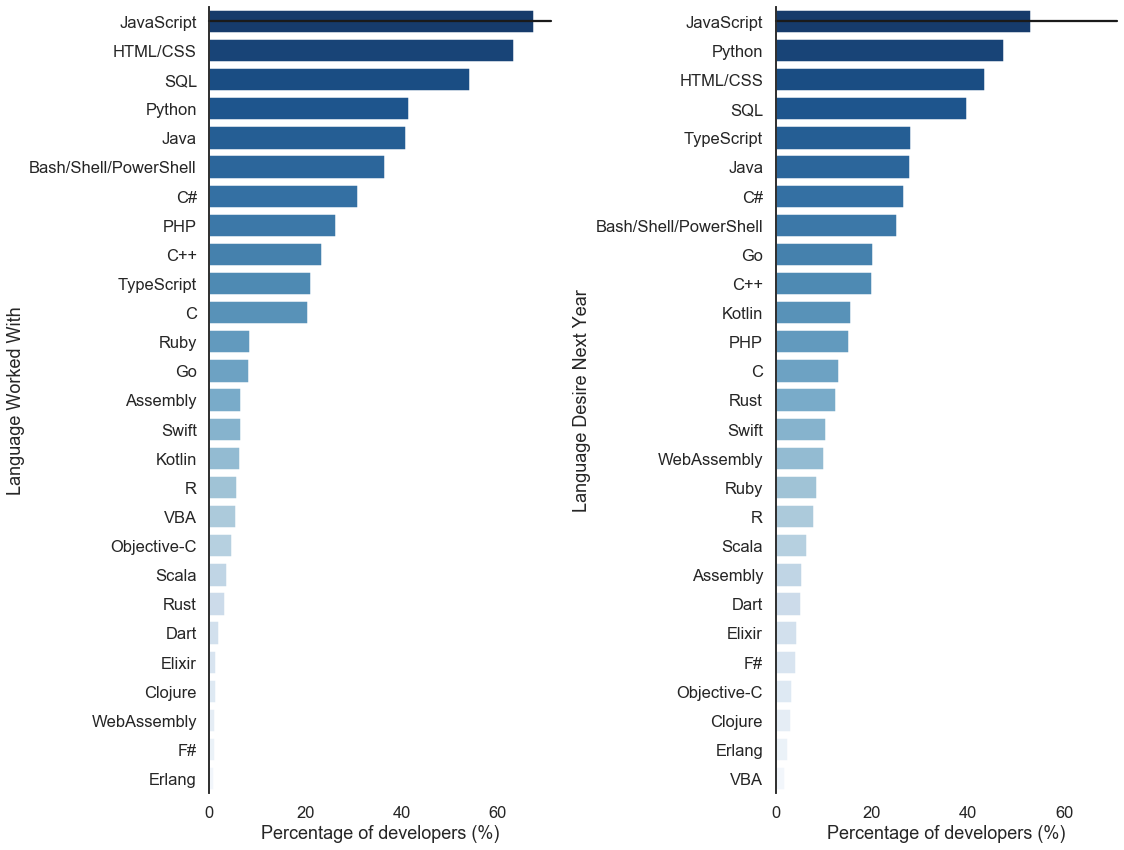

In [11]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", context="talk")
rs = np.random.RandomState(8)

# Set up the matplotlib figure
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, plot_data.index.shape[0]*0.45), sharex=True)

# Generate some sequential data

sns.barplot(x=plot_data.values, y=plot_data.index,
            palette="Blues_r",
            ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Language Worked With")
ax1.set_xlabel("Percentage of developers (%)")


sns.barplot(x=plot_data_2.values, y=plot_data_2.index,
            palette="Blues_r",
            ax=ax2)
ax2.axhline(0, color='k', clip_on=False)
ax2.set_ylabel("Language Desire Next Year")
ax2.set_xlabel("Percentage of developers (%)")

# Finalize the plot
sns.despine(bottom=True)
#plt.setp(f.axes, yticks=[plot_data.index])
plt.tight_layout(h_pad=10)

In [12]:
DatabaseWorkedWith = clean_col(df_2019['DatabaseWorkedWith'])
DatabaseDesireNextYear = clean_col(df_2019['DatabaseDesireNextYear'])

In [13]:
plot_data = DatabaseWorkedWith.value_counts()/df_2019['DatabaseWorkedWith'].dropna().shape[0]*100
plot_data = plot_data[plot_data.index != 'Other(s):']
plot_data

MySQL                   53.319917
PostgreSQL              33.880515
Microsoft SQL Server    32.344198
SQLite                  31.190645
MongoDB                 25.122984
Redis                   18.376608
MariaDB                 16.311525
Oracle                  16.248389
Elasticsearch           14.100439
Firebase                12.643043
DynamoDB                 6.088706
Cassandra                3.415937
Couchbase                1.995370
dtype: float64

In [14]:
plot_data_2 = DatabaseDesireNextYear.value_counts()/df_2019['DatabaseDesireNextYear'].dropna().shape[0]*100
plot_data_2 = plot_data_2[plot_data_2.index != 'Other(s):']
plot_data_2

PostgreSQL              38.246056
MySQL                   37.239504
MongoDB                 34.227081
Redis                   25.905679
SQLite                  25.752383
Microsoft SQL Server    23.464503
Elasticsearch           22.329241
Firebase                17.240083
MariaDB                 14.441697
Oracle                  10.555772
DynamoDB                 8.859387
Cassandra                8.758153
Couchbase                3.570654
dtype: float64

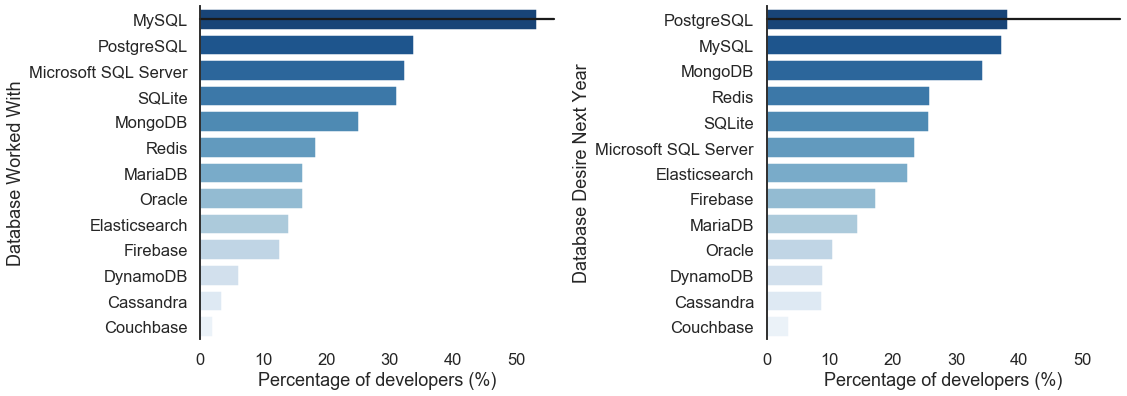

In [15]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", context="talk")
rs = np.random.RandomState(8)

# Set up the matplotlib figure
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, plot_data.index.shape[0]*0.45), sharex=True)

# Generate some sequential data

sns.barplot(x=plot_data.values, y=plot_data.index,
            palette="Blues_r",
            ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Database Worked With")
ax1.set_xlabel("Percentage of developers (%)")


sns.barplot(x=plot_data_2.values, y=plot_data_2.index,
            palette="Blues_r",
            ax=ax2)
ax2.axhline(0, color='k', clip_on=False)
ax2.set_ylabel("Database Desire Next Year")
ax2.set_xlabel("Percentage of developers (%)")

# Finalize the plot
sns.despine(bottom=True)
#plt.setp(f.axes, yticks=[plot_data.index])
plt.tight_layout(h_pad=10)

In [16]:
PlatformWorkedWith = clean_col(df_2019['PlatformWorkedWith'])
PlatformDesireNextYear = clean_col(df_2019['PlatformDesireNextYear'])

In [17]:
plot_data = PlatformWorkedWith.value_counts()/df_2019['PlatformWorkedWith'].dropna().shape[0]*100
plot_data = plot_data[plot_data.index != 'Other(s):']
plot_data

Linux                    52.968506
Windows                  50.338231
Docker                   31.236217
Android                  26.809475
AWS                      26.394430
MacOS                    22.060609
Slack                    20.718834
Raspberry Pi             15.094036
WordPress                14.365538
iOS                      12.941993
Google Cloud Platform    12.300221
Microsoft Azure          11.804644
Arduino                  10.584285
Heroku                   10.564462
Kubernetes                8.468172
IBM Cloud or Watson       1.875759
dtype: float64

In [18]:
plot_data_2 = PlatformDesireNextYear.value_counts()/df_2019['PlatformDesireNextYear'].dropna().shape[0]*100
plot_data_2 = plot_data_2[plot_data_2.index != 'Other(s):']
plot_data_2

Linux                    54.463283
Docker                   42.564209
Windows                  36.433248
AWS                      33.957879
Android                  31.957698
Kubernetes               22.975608
Raspberry Pi             22.943326
MacOS                    22.510750
Google Cloud Platform    20.551890
iOS                      18.715701
Slack                    17.494157
Microsoft Azure          15.363558
Arduino                  14.388647
Heroku                    9.718115
WordPress                 8.504319
IBM Cloud or Watson       3.792467
dtype: float64

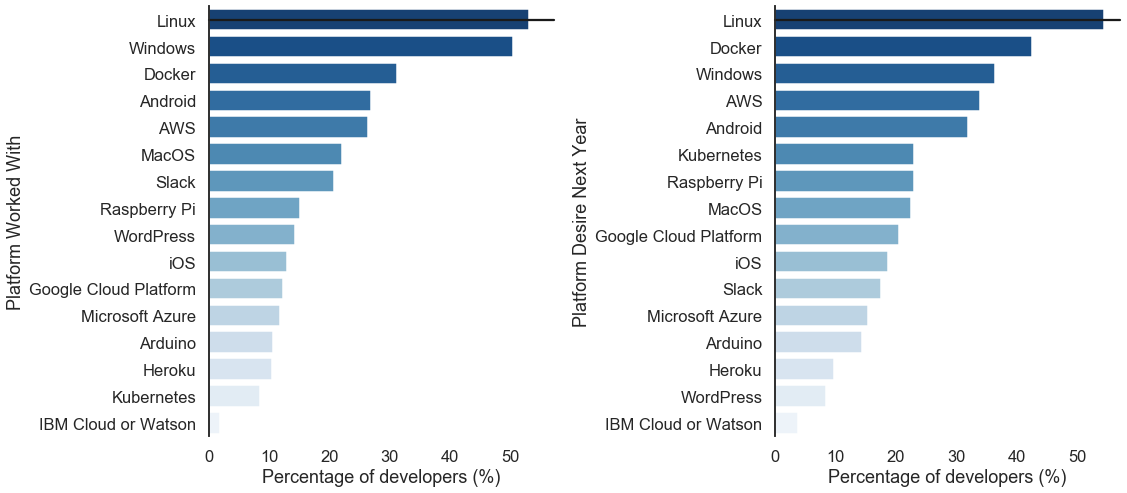

In [19]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", context="talk")
rs = np.random.RandomState(8)

# Set up the matplotlib figure
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, plot_data.index.shape[0]*0.45), sharex=True)

# Generate some sequential data

sns.barplot(x=plot_data.values, y=plot_data.index,
            palette="Blues_r",
            ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Platform Worked With")
ax1.set_xlabel("Percentage of developers (%)")


sns.barplot(x=plot_data_2.values, y=plot_data_2.index,
            palette="Blues_r",
            ax=ax2)
ax2.axhline(0, color='k', clip_on=False)
ax2.set_ylabel("Platform Desire Next Year")
ax2.set_xlabel("Percentage of developers (%)")

# Finalize the plot
sns.despine(bottom=True)
#plt.setp(f.axes, yticks=[plot_data.index])
plt.tight_layout(h_pad=10)

In [20]:
WebFrameWorkedWith = clean_col(df_2019['WebFrameWorkedWith'])
WebFrameDesireNextYear = clean_col(df_2019['WebFrameDesireNextYear'])

In [21]:
plot_data = WebFrameWorkedWith.value_counts()/df_2019['WebFrameWorkedWith'].dropna().shape[0]*100
plot_data = plot_data[plot_data.index != 'Other(s):']
plot_data

jQuery                47.646950
React.js              30.569653
Angular/Angular.js    30.039064
ASP.NET               25.682077
Express               19.258097
Spring                15.837716
Vue.js                14.873427
Django                12.686475
Flask                 11.832918
Laravel               10.271908
Ruby on Rails          8.035742
Drupal                 3.375781
dtype: float64

In [22]:
plot_data_2 = WebFrameDesireNextYear.value_counts()/df_2019['WebFrameDesireNextYear'].dropna().shape[0]*100
plot_data_2 = plot_data_2[plot_data_2.index != 'Other(s):']
plot_data_2

React.js              46.916307
Vue.js                31.431113
Angular/Angular.js    31.173742
jQuery                26.877860
ASP.NET               21.439692
Express               19.210727
Django                18.044611
Spring                15.642476
Flask                 12.968671
Ruby on Rails         10.536350
Laravel               10.383833
Drupal                 2.443442
dtype: float64

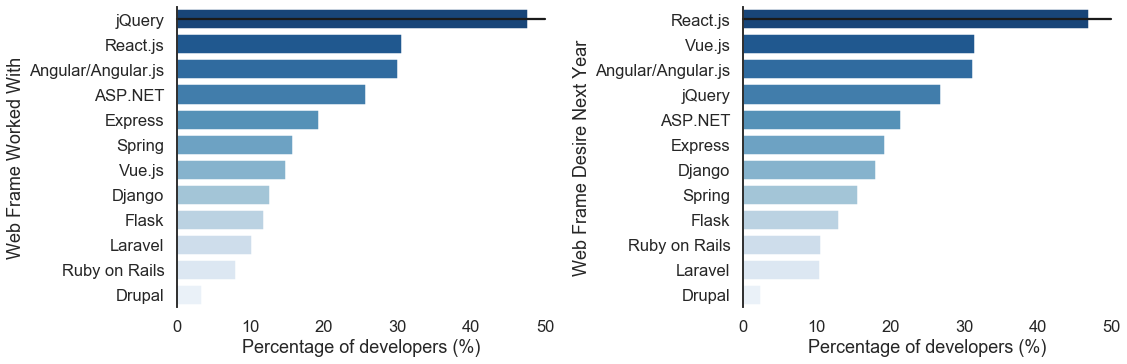

In [23]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", context="talk")
rs = np.random.RandomState(8)

# Set up the matplotlib figure
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, plot_data.index.shape[0]*0.45), sharex=True)

# Generate some sequential data

sns.barplot(x=plot_data.values, y=plot_data.index,
            palette="Blues_r",
            ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Web Frame Worked With")
ax1.set_xlabel("Percentage of developers (%)")


sns.barplot(x=plot_data_2.values, y=plot_data_2.index,
            palette="Blues_r",
            ax=ax2)
ax2.axhline(0, color='k', clip_on=False)
ax2.set_ylabel("Web Frame Desire Next Year")
ax2.set_xlabel("Percentage of developers (%)")

# Finalize the plot
sns.despine(bottom=True)
#plt.setp(f.axes, yticks=[plot_data.index])
plt.tight_layout(h_pad=10)